In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df['Gender'] = df['Gender'].replace({'Male' : 1, 'Female' : 0})

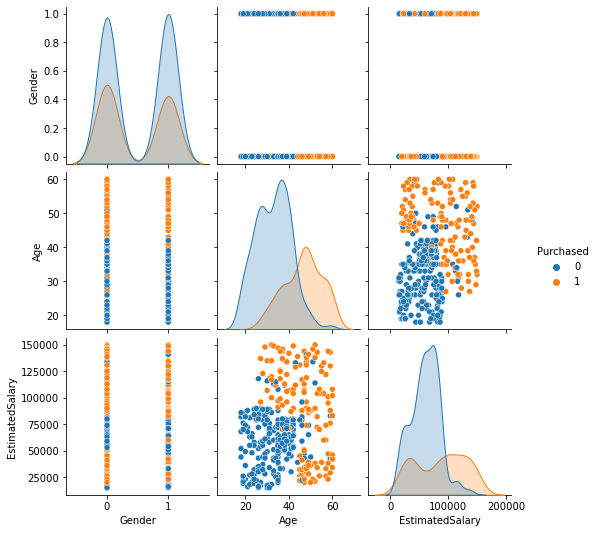

In [89]:
sns.pairplot(df.iloc[:,1:], hue = 'Purchased')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
X = df.iloc[:, 1:4]
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [10]:
y = df['Purchased']

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
sc = StandardScaler()

In [14]:
X_train = sc.fit_transform(X_train)

In [15]:
X_test = sc.transform(X_test)

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
pred = model.predict(X_test)

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[72  1]
 [17 30]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120



In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
params = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

In [22]:
grid = GridSearchCV(SVC(),params,refit=True,verbose=3)

In [23]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.839 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.911 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.804 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.821 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.768 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.839 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.875 total time=   0.0s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.786 total time=   0.0s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.661 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.661 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.661 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.661 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.643 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.804 total time=   0.0s
[CV 4/5] END .......C=1, gam

[CV 3/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.804 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.804 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.01, kernel=sigmoid;, score=0.804 total time=   0.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.804 total time=   0.0s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.875 total time=   0.0s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.768 total time=   0.0s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.661 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.661 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.661 total time=   0.0s
[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.661 total time=   0.0s
[CV 5/5] END ....C=10, gamma

[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.768 total time=   0.0s
[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 2/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 3/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 4/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 5/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.643 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.804 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.804 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.804 total time=   0.0s
[CV 5/5] END ...C=100, gamma

[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.661 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.0001, kernel=poly;, score=0.643 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.839 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.804 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.804 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.804 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, kernel=sigmoid;, score=0.804 total time=   0.0s
[CV 2/5] END C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [24]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [25]:
grid_pred = grid.predict(X_test)

In [26]:
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))

[[68  5]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [27]:
from qiskit import Aer, execute
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

In [81]:
zz_map = ZZFeatureMap(feature_dimension=3, reps=1, entanglement='linear', insert_barriers=True)

In [82]:
zz_kernel = QuantumKernel(feature_map=zz_map, quantum_instance=Aer.get_backend('statevector_simulator'))

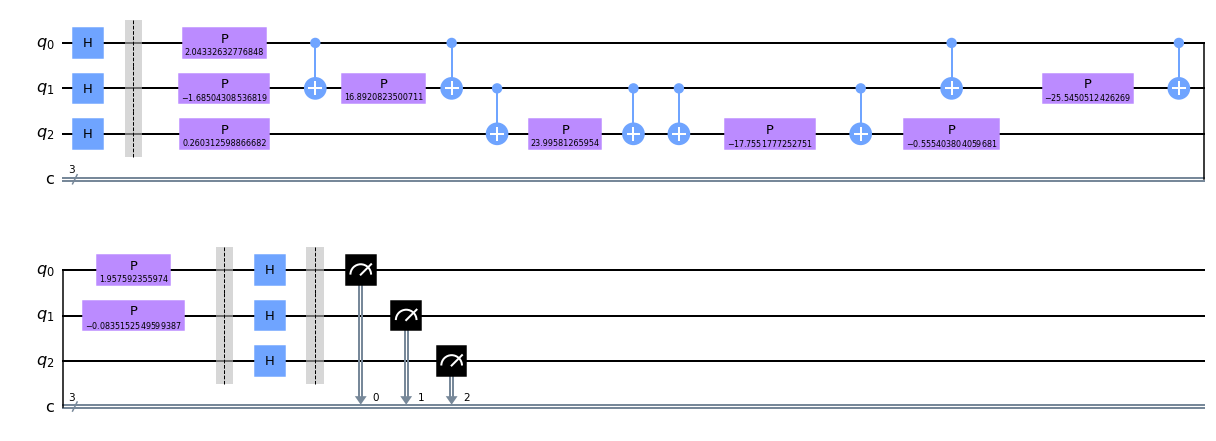

In [83]:
zz_circuit = zz_kernel.construct_circuit(X_train[0], X_train[1])
zz_circuit.decompose().decompose().draw(output='mpl')

In [84]:
matrix_train = zz_kernel.evaluate(x_vec=X_train)
matrix_test = zz_kernel.evaluate(x_vec=X_test, y_vec=X_train)

In [85]:
zzcb_svc = SVC(kernel=zz_kernel.evaluate)
zzcb_svc.fit(X_train, y_train)

SVC(kernel=<bound method QuantumKernel.evaluate of <qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x000001B16A9D5B50>>)

In [86]:
predict = zzcb_svc.predict(X_test)

In [87]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test,predict))

[[70  3]
 [36 11]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        73
           1       0.79      0.23      0.36        47

    accuracy                           0.68       120
   macro avg       0.72      0.60      0.57       120
weighted avg       0.71      0.68      0.62       120

